# Confridence Interval


From a random sample, construct a 95% confidence interval for the ages of the mothers in the population.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [ ]:
from google.colab import files
file_uploaded = files.upload()

Saving baby.csv to baby.csv


In [ ]:
births = pd.read_csv('baby.csv')
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [ ]:
def percentile(data, p):
  return np.percentile(data, p, method='inverted_cdf')

In [ ]:
def avg_age(sample):
  return np.average(sample['Maternal Age'])

In [ ]:
def bootstrapper(sample, statistics, num_repetitions):
  bstrap_stats = []
  for i in np.arange(num_repetitions):
    # step 1: sample the sample
    bstrap_sample = sample.sample(len(sample),replace=True)
    # step 2: compute statistics on the sample eo the sample
    bstrap_stat = statistics(bstrap_sample)
    # accumulate the statistics
    bstrap_stats = np.append(bstrap_stats, bstrap_stat)
  return bstrap_stats

In [ ]:
def compute_ci(bs_samples, confidence_level):
  tail_size = (100-confidence_level)/2
  lower = percentile(bs_samples, tail_size)
  upper = percentile(bs_samples, 100-tail_size)
  return [lower, upper]

In [ ]:
bootstrap_means = bootstrapper(births, avg_age, 3000)
ci = compute_ci(bootstrap_means, 95)
ci

[26.894378194207835, 27.567291311754683]

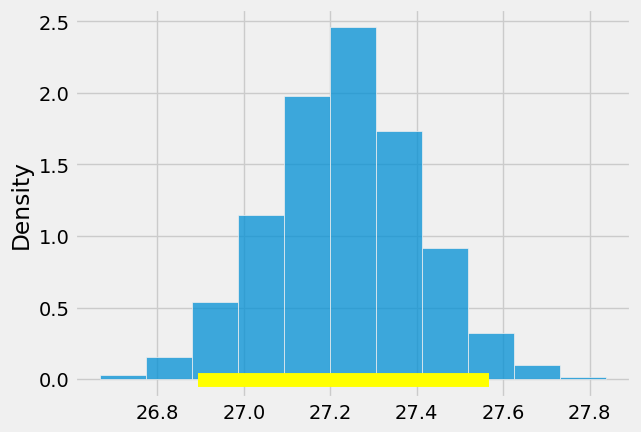

In [ ]:
data = bootstrap_means
fig, ax = plt.subplots()
ax = sns.histplot(data, bins = 11, stat='density')
plt.plot(ci, [-0.01,-0.01], color = 'yellow', lw=10, zorder=2)
plt.show()

# Methods based on CLT

In [ ]:
sampled_ages = births['Maternal Age']
sample_size = len(sampled_ages)
sample_average = np.average(sampled_ages)
sample_SD = np.std(sampled_ages)

print(f"Sample Size: {sample_size}")
print(f"Sample Average: {sample_average}")
print(f"Sample SD: {sample_SD}")


Sample Size: 1174
Sample Average: 27.228279386712096
Sample SD: 5.815360404190897



We need to add and subtract 2⋅(Population SD√Sample_Size) but we don't have the population SD.

In [ ]:
# Try estimating it from the sample

estimated_SD_of_sample_average = sample_SD / (sample_size**0.5)
estimated_SD_of_sample_average

0.16972373742299796

In [ ]:
# Approximate 95% confidence interval for population mean

sample_average - 2*estimated_SD_of_sample_average, sample_average + 2*estimated_SD_of_sample_average

(26.8888319118661, 27.567726861558093)

# SD of 0/1 population

In [ ]:
# population of size 10
number_of_ones = 4
zero_one_population = np.append(np.ones(number_of_ones), \
            np.zeros(10 - number_of_ones))

print(f"Population: {zero_one_population}")
print(f"Standard Deviation: {np.round(np.std(zero_one_population),2)}")



Population: [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
Standard Deviation: 0.49


In [ ]:
def sd_of_zero_one_population(number_of_ones):
    """Returns the SD of a population
    that has 10 elements: num_ones with value 1 and (10 - num_ones) with value 0"""
    zero_one_population = np.append(np.ones(number_of_ones), \
                np.zeros(10 - number_of_ones))
    return np.std(zero_one_population)

In [ ]:
possible_ones = np.arange(11)
zero_one_pop = pd.DataFrame({
    'Number of Ones': possible_ones,
    'Proportion of Ones': possible_ones / 10
})
zero_one_pop

,Number of Ones,Proportion of Ones
0,0,0.0
1,1,0.1
2,2,0.2
3,3,0.3
4,4,0.4
5,5,0.5
6,6,0.6
7,7,0.7
8,8,0.8
9,9,0.9


In [ ]:
# Generate Population SD of different proportions
sd = np.array([])
for i in np.arange(1, 10, 1):
    # Create an array of i 1's and (10-i) 0's
    population = np.append(np.ones(i), 1-np.ones(10-i))
    sd = np.append(sd, np.std(population))

zero_one_sds = pd.DataFrame({
    "Population Proportion of 1's": np.arange(0.1, 1, 0.1),
    "Population SD": sd
})

zero_one_sds

,Population Proportion of 1's,Population SD
0,0.1,0.300000
1,0.2,0.400000
2,0.3,0.458258
3,0.4,0.489898
4,0.5,0.500000
5,0.6,0.489898
6,0.7,0.458258
7,0.8,0.400000
8,0.9,0.300000


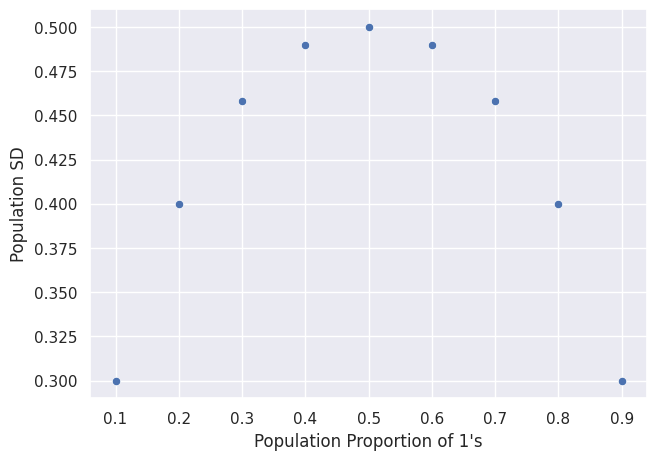

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
fig, ax = plt.subplots()

ax = sns.scatterplot(data=zero_one_sds,  \
                  x="Population Proportion of 1's", \
                 y='Population SD')
plt.show()